------------------------------------------

In [ ]:
!pip install xgboost

In [ ]:
# importar as bibliotecas
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Carregar os dados
df = pd.read_csv("bank-full.csv")

In [ ]:
df.shape

(45211, 17)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# EDA

# Selecionar as colunas categóricas
cat_columns = df.select_dtypes(["object"]).columns
cat_columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
# Converte colunas categóricas em numéricas
df[cat_columns] = df[cat_columns].astype("category").apply(lambda x: x.cat.codes)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  Target     45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
# definir as features e o target - outra forma de mostrar os dados
X=df.drop('Target', axis=1).copy()
y=df["Target"].copy()

In [ ]:
# particionar dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, stratify=y, random_state=42)

In [ ]:
# instanciar a classe do modelo
xgb= XGBClassifier(device="gpu")

# faz o treino na base de treino
xgb.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:54:23] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# para não aparecer warning enquanto estamos trabalhando
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste
y_pred_xgb = xgb.predict(X_test)
# Verifica o modelo com o classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.63      0.48      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



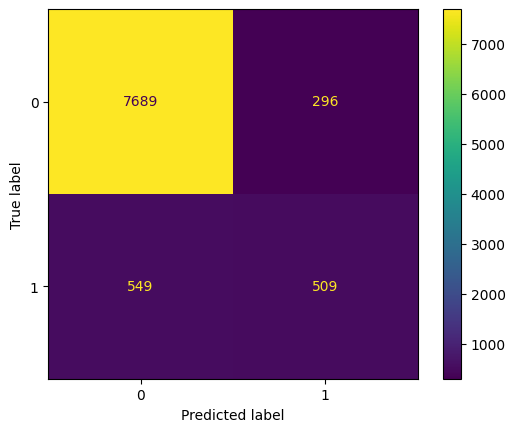

In [ ]:
# Calcula a confusion_matrix para o teste
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# Plota a confusion matrix
ConfusionMatrixDisplay(cm_xgb).plot()

In [ ]:
# Alterar o hiperparâmetro - o certo seria fazer um grid search

# instanciar a classe do modelo
xgb = XGBClassifier(n_estimators=1000)

# faz o treino na base de treino
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Alterar o hiperparâmetro - o certo seria fazer um grid search
# AGORA COM GPU
# instanciar a classe do modelo
xgb = XGBClassifier(device="gpu",n_estimators=1000)

# faz o treino na base de treino
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste
y_pred_xgb = xgb.predict(X_test)
# Verifica o modelo com o classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7985
           1       0.60      0.48      0.53      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043



# Feature importance

In [ ]:
# Importa o método plot_importance do xgboost
from xgboost import plot_importance

plot_importance(xgb)


NotFittedError: ignored

Não precisa normalizar ou padronizar pois ele é baseado em árvores. As árvores não usam métodos de distância e sim separação dos dados de uma feature

In [ ]:
# Vamos considerar apenas as 3 features mais importantes
x_importance = X[['duration', 'balance', 'age']]
#### particionar dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_importance, y, stratify=y, test_size=.2, random_state=42)


In [ ]:
xgb = XGBClassifier(device='gpu', n_estimators= 1000)

xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste
y_pred_xgb = xgb.predict(X_test)
# Verifica o modelo com o classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7985
           1       0.43      0.25      0.32      1058

    accuracy                           0.87      9043
   macro avg       0.67      0.60      0.62      9043
weighted avg       0.85      0.87      0.86      9043



In [ ]:
# usar pipeline, usar grid/search random, usar um dataset para fazer regressão

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth':[3,4,5],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample': [ 0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

xgb = XGBClassifier(device="gpu")

grid_search = GridSearchCV( estimator = xgb, param_grid=param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='gpu',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [10, 20, 30],
                         'subsample': [0.8, 0.9, 1]},
             scoring='f1_weighted')

In [ ]:
grid_search.best_params_, grid_search.best_estimator_

({'colsample_bytree': 1,
  'learning_rate': 0.2,
  'max_depth': 4,
  'n_estimators': 30,
  'subsample': 1},
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               device='gpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=30, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...))

In [ ]:
#xgb = XGBClassifier(device='gpu', n_estimators= 1000)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Avaliar o modelo

# Faz a predição do modelo treinado na base de teste
y_pred_xgb = xgb.predict(X_test)
# Verifica o modelo com o classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7985
           1       0.52      0.22      0.31      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.60      0.62      9043
weighted avg       0.86      0.88      0.86      9043



In [ ]:
# Utilizando RandomSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Configuração inicial do modelo de classificação
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Identificar variáveis categóricas para a codificação
categorical_features = df.select_dtypes(include=['object']).columns

# Criar um transformer para codificar as variáveis categóricas
categorical_transformer = OneHotEncoder(drop='first')

# Criar um ColumnTransformer que aplica a codificação apenas nas variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Deixa as outras colunas numéricas inalteradas
)

In [ ]:
# Criar o pipeline com o pré-processador e o modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

In [ ]:
# Configuração do RandomizedSearchCV
param_distributions = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=5,
                                   scoring='accuracy', n_jobs=-1, cv=3, random_state=42)


In [ ]:
# Treinar o modelo usando o RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(drop='first'),
                                                                               Index([], dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Melhores parâmetros encontrados
best_params = random_search.best_params_

In [ ]:
# Avaliar o modelo
y_pred = random_search.predict(X_test)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Verifica o modelo com o classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7985
           1       0.52      0.22      0.31      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.60      0.62      9043
weighted avg       0.86      0.88      0.86      9043

